In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Loading Data and removing rows where no rating has been provided
beer_data = pd.read_csv("gdrive/My Drive/beer_data.csv")
beer_data['beer_beerid'] = beer_data.beer_beerid.astype(str)
beer_data = beer_data[beer_data["review_overall"]>0]
beer_data.head()

,beer_beerid,review_profilename,review_overall
0,48215,stcules,3.0
1,52159,oline73,3.0
2,52159,alpinebryant,3.0
3,52159,rawthar,4.0
4,52159,RangerClegg,3.5


In [0]:
#Creating Column to remove duplicate rows
beer_data["dup"] = beer_data.beer_beerid.astype(str) + beer_data.review_profilename.astype(str)

In [5]:
beer_data.drop_duplicates("dup",inplace = True)
beer_data.shape

(474554, 4)

In [6]:
# Creating Column for frequency of counts of beers
beer_data['freq'] = beer_data.groupby('beer_beerid')['beer_beerid'].transform('count')
beer_data.head()

,beer_beerid,review_profilename,review_overall,dup,freq
0,48215,stcules,3.0,48215stcules,1
1,52159,oline73,3.0,52159oline73,4
2,52159,alpinebryant,3.0,52159alpinebryant,4
3,52159,rawthar,4.0,52159rawthar,4
4,52159,RangerClegg,3.5,52159RangerClegg,4


In [0]:
#calculating average value of counts
beer_beerid_count = beer_data.groupby("beer_beerid")["review_overall"].count()

In [8]:
beer_beerid_count.values.mean()

11.77378057857391

In [0]:
#Considering data where a beer has been rated by more than 30 users
beer_data = beer_data[beer_data["freq"]>30]

In [0]:
# Average Ratings given to beer
beer_beerid_avg = beer_data.groupby("beer_beerid")["review_overall"].mean().round(0)

In [11]:
beer_beerid_avg

beer_beerid
10      4.0
100     3.0
1002    4.0
1003    4.0
1005    4.0
       ... 
9946    4.0
9951    4.0
9962    4.0
997     4.0
999     4.0
Name: review_overall, Length: 3058, dtype: float64

<BarContainer object of 3058 artists>

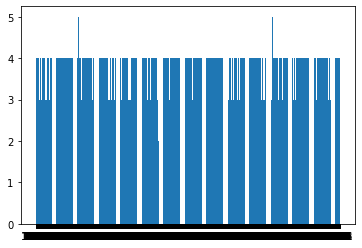

In [12]:
plt.bar(beer_beerid_avg.index, beer_beerid_avg.values)

In [0]:
#Average ratings given by users
beer_review_profilename_avg = beer_data.groupby("review_profilename")["review_overall"].mean().round(0)

In [14]:
beer_review_profilename_avg

review_profilename
0110x011       4.0
01Ryan10       5.0
04101Brewer    4.0
05Harley       4.0
0beerguy0      4.0
              ... 
zymurgy4all    4.0
zymurgywhiz    4.0
zythus         4.0
zyzygy         4.0
zzajjber       5.0
Name: review_overall, Length: 20183, dtype: float64

In [0]:
plt.bar(beer_review_profilename_avg.index,beer_review_profilename_avg.values)

<BarContainer object of 3058 artists>

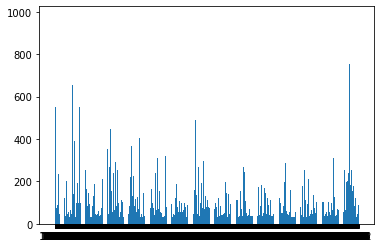

In [15]:
#Average count of reviews to beer
beer_beerid_count1 = beer_data.groupby("beer_beerid")["review_overall"].count().round(0)
plt.bar(beer_beerid_count1.index , beer_beerid_count1.values)

In [16]:
beer_beerid_count1.values.mean()

109.4434270765206

In [0]:
#Average count of reviews given by user
beer_review_profilename_count1 = beer_data.groupby("review_profilename")["review_overall"].count()

In [0]:
plt.bar(beer_review_profilename_count1.index,beer_review_profilename_count1.values)

In [18]:
beer_review_profilename_count1.values.mean()

16.578903037209532

In [0]:
#Dividing data into train and test
from sklearn.model_selection import train_test_split
train, test = train_test_split(beer_data, test_size=0.30, random_state=31)

In [0]:
# pivot ratings into movie features
df_beer_features = train.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).fillna(0)

In [21]:
df_beer_features.head()

beer_beerid,10,100,1002,1003,1005,10071,1008,1009,10096,101,1010,1011,1012,1013,1014,1015,1017,1018,102,1027,103,10301,10302,10308,10325,10330,10331,10364,10365,10386,104,10414,10433,10481,10482,1052,10526,1053,10536,1054,...,9478,9490,9548,9584,9590,96,960,9603,962,963,9630,9659,966,9689,97,9749,9755,976,9763,977,9777,9781,9801,981,982,984,9845,986,987,9873,99,9900,9906,991,993,9946,9951,9962,997,999
review_profilename,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
04101Brewer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0beerguy0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


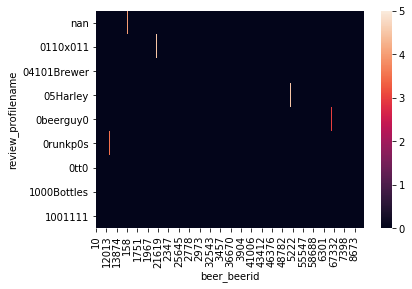

In [22]:
sns.heatmap(df_beer_features.iloc[0:9])

In [0]:
#Creating dummy test and dummy train
dummy_train = train.copy()
dummy_test = test.copy()

In [0]:
dummy_train['review_overall'] = dummy_train['review_overall'].apply(lambda x: 0 if x>=1 else 1)
dummy_test['review_overall'] = dummy_test['review_overall'].apply(lambda x: 1 if x>=1 else 0)

In [0]:
# The movies not rated by user is marked as 1 for prediction. 
dummy_train = dummy_train.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).fillna(1)

# The movies not rated by user is marked as 0 for evaluation. 
dummy_test = dummy_test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).fillna(0)

In [26]:
dummy_train.head()

beer_beerid,10,100,1002,1003,1005,10071,1008,1009,10096,101,1010,1011,1012,1013,1014,1015,1017,1018,102,1027,103,10301,10302,10308,10325,10330,10331,10364,10365,10386,104,10414,10433,10481,10482,1052,10526,1053,10536,1054,...,9478,9490,9548,9584,9590,96,960,9603,962,963,9630,9659,966,9689,97,9749,9755,976,9763,977,9777,9781,9801,981,982,984,9845,986,987,9873,99,9900,9906,991,993,9946,9951,9962,997,999
review_profilename,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0110x011,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
04101Brewer,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
05Harley,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0beerguy0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [27]:
dummy_test.head()

beer_beerid,10,100,1002,1003,1005,10071,1008,1009,10096,101,1010,1011,1012,1013,1014,1015,1017,1018,102,1027,103,10301,10302,10308,10325,10330,10331,10364,10365,10386,104,10414,10433,10481,10482,1052,10526,1053,10536,1054,...,9478,9490,9548,9584,9590,96,960,9603,962,963,9630,9659,966,9689,97,9749,9755,976,9763,977,9777,9781,9801,981,982,984,9845,986,987,9873,99,9900,9906,991,993,9946,9951,9962,997,999
review_profilename,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01Ryan10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0beerguy0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
#Finding user similarity using cosine similarity measure
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
user_correlation = 1 - pairwise_distances(df_beer_features, metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1.         0.06648366 0.         ... 0.         0.         0.        ]
 [0.06648366 1.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [29]:
user_correlation.shape

(17743, 17743)

In [0]:
#Calculating user similarity using adjusted similarity measure
adj_cos_beer_features = train.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

In [31]:
adj_cos_beer_features.head()

beer_beerid,10,100,1002,1003,1005,10071,1008,1009,10096,101,1010,1011,1012,1013,1014,1015,1017,1018,102,1027,103,10301,10302,10308,10325,10330,10331,10364,10365,10386,104,10414,10433,10481,10482,1052,10526,1053,10536,1054,...,9478,9490,9548,9584,9590,96,960,9603,962,963,9630,9659,966,9689,97,9749,9755,976,9763,977,9777,9781,9801,981,982,984,9845,986,987,9873,99,9900,9906,991,993,9946,9951,9962,997,999
review_profilename,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0110x011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04101Brewer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05Harley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0beerguy0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
mean = np.nanmean(adj_cos_beer_features, axis=1)
df_subtracted = (adj_cos_beer_features.T-mean).T

In [33]:
df_subtracted.head()

beer_beerid,10,100,1002,1003,1005,10071,1008,1009,10096,101,1010,1011,1012,1013,1014,1015,1017,1018,102,1027,103,10301,10302,10308,10325,10330,10331,10364,10365,10386,104,10414,10433,10481,10482,1052,10526,1053,10536,1054,...,9478,9490,9548,9584,9590,96,960,9603,962,963,9630,9659,966,9689,97,9749,9755,976,9763,977,9777,9781,9801,981,982,984,9845,986,987,9873,99,9900,9906,991,993,9946,9951,9962,997,999
review_profilename,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.278846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.278846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0110x011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.26087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04101Brewer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05Harley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0beerguy0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[ 1.00000000e+00 -9.75984478e-04  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-9.75984478e-04  1.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


In [35]:
user_correlation[user_correlation<0]=0
user_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [36]:
#Predicting Ratings
user_predicted_ratings = np.dot(user_correlation, adj_cos_beer_features.fillna(0))
user_predicted_ratings

array([[9.89751297, 4.71457187, 5.72852242, ..., 3.28049882, 1.6724735 ,
        2.33525412],
       [1.88160445, 1.07855782, 1.64362626, ..., 1.51733736, 0.50419867,
        0.3935005 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [0]:
user_predicted_ratings.shape

In [0]:
#Nulyfing Rating for which a user has already rated using dummy train created
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

In [0]:
user_final_rating.iloc[1].sort_values(ascending=False)[0:5]

In [0]:
#Creating Item based recomendation sysytem
item_beer_features = train.pivot(
    index='beer_beerid',
    columns='review_profilename',
    values='review_overall'
)

item_beer_features.head()

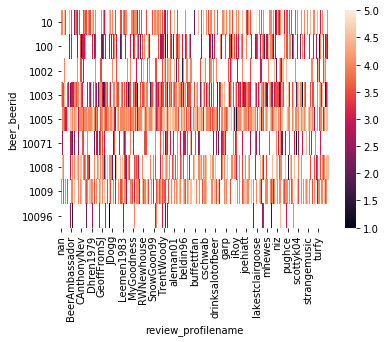

In [73]:
sns.heatmap(item_beer_features.iloc[0:9])

In [0]:
item_mean = np.nanmean(item_beer_features, axis=1)
df_item_subtracted = (item_beer_features.T-item_mean).T

In [43]:
df_item_subtracted.head()

review_profilename,NaN,0110x011,04101Brewer,05Harley,0beerguy0,0runkp0s,0tt0,1000Bottles,1001111,100floods,1050Sudz,108Dragons,1099,1121987,11millsown113,11osixBrew,11thFloorBrewing,1229design,12ouncecurls,12percent,12vUnion,130guy,160Shillings,1759Girl,18alpha,1996StrokerKid,1Adam12,1BeerLeague,1PA,1Paradisebrew,1after909,1fastz28,1inamill,1morebeer,1noa,1santore,1whiskey,20ozmonkey,21mmer,220emaple,...,zfjohnson,zhanson88,zhooker,zic,ziggy13,zimm421,zimmerbloke,zipperergj,zipyth3pinhead,zjungleist,zloew,zminor,zms101,znarf,znichols,zodiak3000,zooalbert,zooga,zook74,zoolzoo,zornbeast,zoso1967,zoso493,zplug123,zrab11,zseeanz,zsk,ztaylor1,zuccard,zuffenhausen,zuggy9,zuker,zumicroom,zwalk8,zwan,zymrgy,zymurgy4all,zymurgywhiz,zythus,zyzygy
beer_beerid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.162162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
item_correlation = 1 - pairwise_distances(df_item_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[ 1.         -0.00250865 -0.00240048 ... -0.03868089  0.01932776
  -0.0014734 ]
 [-0.00250865  1.         -0.00543817 ...  0.00594843  0.01000902
  -0.00543966]
 [-0.00240048 -0.00543817  1.         ... -0.01448013  0.00694732
   0.        ]
 ...
 [-0.03868089  0.00594843 -0.01448013 ...  1.         -0.02553371
   0.        ]
 [ 0.01932776  0.01000902  0.00694732 ... -0.02553371  1.
  -0.02265042]
 [-0.0014734  -0.00543966  0.         ...  0.         -0.02265042
   1.        ]]


In [45]:
item_correlation[item_correlation<0]=0
item_correlation

array([[1.        , 0.        , 0.        , ..., 0.        , 0.01932776,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.00594843, 0.01000902,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.00694732,
        0.        ],
       ...,
       [0.        , 0.00594843, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.01932776, 0.01000902, 0.00694732, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [46]:
item_predicted_ratings = np.dot((item_beer_features.fillna(0).T),item_correlation)
item_predicted_ratings

array([[1.18296999e+00, 1.89946943e+00, 9.60535458e-01, ...,
        1.51574984e+00, 1.15113271e+00, 2.54303906e+00],
       [4.56484174e-01, 1.45149528e+00, 8.96357109e-01, ...,
        3.25238071e-01, 6.74480741e-01, 9.88304125e-01],
       [0.00000000e+00, 1.73595872e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.08720730e-04, 8.18486448e-02, 1.76497668e-02, ...,
        4.64430103e-02, 2.44196592e-03, 0.00000000e+00],
       [8.74102684e-02, 1.96650593e-01, 2.68821959e-02, ...,
        3.81563930e-02, 0.00000000e+00, 3.75507695e-02],
       [2.72439302e-01, 1.45836869e-01, 1.53337915e-01, ...,
        1.44446204e-01, 1.03944586e-01, 3.60735033e-01]])

In [47]:
item_predicted_ratings.shape

(17743, 3058)

In [48]:
dummy_train.shape

(17743, 3058)

In [49]:
#Making Prediction
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

beer_beerid,10,100,1002,1003,1005,10071,1008,1009,10096,101,1010,1011,1012,1013,1014,1015,1017,1018,102,1027,103,10301,10302,10308,10325,10330,10331,10364,10365,10386,104,10414,10433,10481,10482,1052,10526,1053,10536,1054,...,9478,9490,9548,9584,9590,96,960,9603,962,963,9630,9659,966,9689,97,9749,9755,976,9763,977,9777,9781,9801,981,982,984,9845,986,987,9873,99,9900,9906,991,993,9946,9951,9962,997,999
review_profilename,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NaN,1.182970,1.899469,0.960535,1.667787,2.150886,1.751547,1.208835,2.662943,1.229502,2.361813,1.904461,1.302063,1.371303,0.000000,2.773611,1.524341,1.386699,1.465549,1.777320,0.942763,1.261834,2.524056,1.020030,1.096758,1.980942,1.018130,1.213939,1.960508,0.895936,1.099684,0.000000,0.701545,1.522230,1.973582,1.481677,1.176877,2.508285,0.563246,1.035783,2.196860,...,1.634592,3.113963,1.796337,2.020371,1.289111,2.236076,0.771976,1.657456,1.349160,0.894219,0.992584,1.263883,1.307716,2.121257,1.030770,0.640473,1.620511,1.583768,1.262418,1.089749,2.021837,0.484792,2.723526,1.581447,1.414761,1.499963,1.681547,0.430831,1.316230,2.667218,2.032109,1.436335,1.351696,1.360272,2.100043,1.062832,0.891610,1.515750,1.151133,2.543039
0110x011,0.456484,1.451495,0.896357,0.187404,0.729265,0.439621,0.730209,1.054400,0.530156,0.711825,0.903598,0.468093,0.830429,1.169790,1.738772,0.886650,0.487210,0.705071,0.477607,0.341768,0.430826,1.967216,0.455290,1.342752,0.000000,0.572622,0.635676,0.621354,1.180213,0.793735,0.292276,0.435009,0.989010,1.290486,0.649110,0.454553,1.350504,0.273771,1.799339,0.750032,...,1.172832,1.029444,0.238697,0.703368,0.731639,1.142782,0.216248,0.530725,0.680259,0.493112,0.682324,0.617382,0.766217,0.393391,0.950050,0.525786,0.880290,0.589717,1.385446,0.532127,1.491572,0.295346,1.190878,0.829918,0.404502,0.357658,0.932432,0.113501,0.270642,0.841855,0.723559,0.547953,0.321732,0.668710,0.222494,0.180838,0.263266,0.325238,0.674481,0.988304
04101Brewer,0.000000,0.017360,0.000000,0.000000,0.060410,0.051816,0.000000,0.000000,0.000000,0.000000,0.012221,0.000000,0.000000,0.000000,0.000000,0.000000,0.010626,0.087797,0.000000,0.000000,0.000000,0.000000,0.038205,0.032702,0.101476,0.000000,0.000000,0.000000,0.000000,0.000000,0.071307,0.121365,0.000000,0.000000,0.000000,0.000000,0.029211,0.000000,0.000000,0.000000,...,0.003063,0.000000,0.000000,0.000000,0.016140,0.058847,0.000000,0.000000,0.000000,0.044263,0.015669,0.000000,0.000000,0.000000,0.032001,0.007372,0.099901,0.000000,0.000000,0.000000,0.041563,0.000000,0.000000,0.000000,0.000000,0.001419,0.140041,0.115939,0.000000,0.000000,0.018200,0.000000,0.000000,0.000000,0.000000,0.000000,0.005373,0.000000,0.000000,0.000000
05Harley,1.052888,0.520884,0.212771,0.651620,0.720435,0.186558,0.642297,1.441762,0.400597,0.742976,0.506248,1.100253,0.640221,0.799542,0.624994,0.469378,0.819090,0.411605,0.573566,0.802283,0.472242,1.011415,0.470429,1.044198,1.343456,0.419339,0.507600,0.904279,0.566971,0.579713,0.787591,0.463550,0.577921,0.887654,0.845596,0.569974,0.937580,0.275076,0.257735,0.907158,...,1.054331,0.605887,0.322182,0.417407,0.582852,0.460901,0.535585,0.700695,0.698367,0.356001,0.648402,0.332892,1.378060,0.407838,0.891569,0.824871,0.388578,0.431729,0.407898,0.529641,1.544145,0.454951,0.857044,0.206176,0.725783,1.039189,0.580326,0.286637,0.330160,0.436951,0.868134,0.820504,0.857367,0.936497,0.385408,0.504951,0.287947,0.335038,0.626495,0.682554
0beerguy0,0.083321,0.310199,0.078666,0.140925,0.050793,0.002251,0.061945,0.011558,0.076649,0.052412,0.067971,0.000000,0.079900,0.055021,0.009897,0.128691,0.092152,0.151129,0.037643,0.006693,0.006217,0.121984,0.066786,0.000000,0.082748,0.026115,0.025403,0.000000,0.000000,0.000000,0.025621,0.014074,0.116420,0.033802,0.063255,0.030062,0.041623,0.481733,0.000000,0.045590,...,0.049096,0.031131,0.103032,0.019747,0.087160,0.030329,0.000000,0.000000,0.025432,0.000000,0.093517,0.079741,0.017158,0.000000,0.190513,0.050198,0.014400,0.408902,0.009859,0.119406,0.043572,0.

In [50]:
item_final_rating.iloc[1].sort_values(ascending=False)[0:5]

beer_beerid
39965    2.570346
34315    2.550867
9135     2.467708
33467    2.466139
10784    2.428137
Name: 0110x011, dtype: float64

In [0]:
#Evaluating User collabrative model
test_beer_features = test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

In [52]:
mean = np.nanmean(test_beer_features, axis=1)
test_df_subtracted = (test_beer_features.T-mean).T

# User Similarity Matrix
test_user_correlation = 1 - pairwise_distances(test_df_subtracted.fillna(0), metric='cosine')
test_user_correlation[np.isnan(test_user_correlation)] = 0
print(test_user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [53]:
test_user_correlation[test_user_correlation<0]=0
test_user_predicted_ratings = np.dot(test_user_correlation, test_beer_features.fillna(0))
test_user_predicted_ratings

array([[1.44967864, 0.46578436, 0.45482089, ..., 0.00647567, 0.        ,
        0.53513251],
       [0.32128578, 0.189558  , 0.        , ..., 0.0961908 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.1824991 , 0.        , 0.0791064 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [0]:
test_user_final_rating = np.multiply(test_user_predicted_ratings,dummy_test)

In [55]:
test_user_final_rating.head()

beer_beerid,10,100,1002,1003,1005,10071,1008,1009,10096,101,1010,1011,1012,1013,1014,1015,1017,1018,102,1027,103,10301,10302,10308,10325,10330,10331,10364,10365,10386,104,10414,10433,10481,10482,1052,10526,1053,10536,1054,...,9478,9490,9548,9584,9590,96,960,9603,962,963,9630,9659,966,9689,97,9749,9755,976,9763,977,9777,9781,9801,981,982,984,9845,986,987,9873,99,9900,9906,991,993,9946,9951,9962,997,999
review_profilename,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.1105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01Ryan10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0beerguy0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
#Scaling data in range of 1-5
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = test_user_final_rating.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(copy=True, feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [0]:
test_ = test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

In [0]:
total_non_nan = np.count_nonzero(~np.isnan(y))

In [59]:
#Calculating reduced mean squared error
rmse = (sum(sum((test_ - y )**2))/total_non_nan)**0.5
print(rmse)

1.9560836761731588


In [0]:
#Evaluating Item based recomendation system
test_item_beer_features = test.pivot(
    index='beer_beerid',
    columns='review_profilename',
    values='review_overall'
)

mean_test_item = np.nanmean(test_item_beer_features, axis=1)
test_df_subtracted = (test_item_beer_features.T-mean_test_item).T

test_item_correlation = 1 - pairwise_distances(test_df_subtracted.fillna(0), metric='cosine')
test_item_correlation[np.isnan(test_item_correlation)] = 0
test_item_correlation[test_item_correlation<0]=0

In [61]:
test_item_correlation.shape

(3058, 3058)

In [62]:
test_item_beer_features.shape

(3058, 12927)

In [63]:
test_item_predicted_ratings = (np.dot(test_item_correlation, test_item_beer_features.fillna(0))).T
test_item_final_rating = np.multiply(test_item_predicted_ratings,dummy_test)
test_item_final_rating.head()

beer_beerid,10,100,1002,1003,1005,10071,1008,1009,10096,101,1010,1011,1012,1013,1014,1015,1017,1018,102,1027,103,10301,10302,10308,10325,10330,10331,10364,10365,10386,104,10414,10433,10481,10482,1052,10526,1053,10536,1054,...,9478,9490,9548,9584,9590,96,960,9603,962,963,9630,9659,966,9689,97,9749,9755,976,9763,977,9777,9781,9801,981,982,984,9845,986,987,9873,99,9900,9906,991,993,9946,9951,9962,997,999
review_profilename,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.802886,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01Ryan10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0beerguy0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
test_ = test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

In [65]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = test_item_final_rating.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))


test_ = test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

MinMaxScaler(copy=True, feature_range=(1, 5))


In [66]:
rmse = (sum(sum((test_ - y )**2))/total_non_nan)**0.5
print(rmse)

2.0607201920956335


In [67]:
#top 5 Recomendation of beer for user Cokes , genog ,giblet using user based collabrative filttering
user_final_rating.loc["cokes"].sort_values(ascending=False)[0:5]

beer_beerid
34      38.365893
412     38.142215
1093    36.052198
1904    35.831167
4083    32.956890
Name: cokes, dtype: float64

In [68]:
user_final_rating.loc["genog"].sort_values(ascending=False)[0:5]

beer_beerid
2093     41.150227
1093     41.034726
412      36.794354
1904     34.459818
11757    34.320427
Name: genog, dtype: float64

In [69]:
user_final_rating.loc["giblet"].sort_values(ascending=False)[0:5]

beer_beerid
412     44.173302
1904    42.026218
2093    41.574786
695     38.897735
131     38.025053
Name: giblet, dtype: float64

In [70]:
#top 5 Recomendation of beer for user Cokes , genog ,giblet using user based collabrative filttering
item_final_rating.loc["cokes"].sort_values(ascending=False)[0:5]

beer_beerid
19426    13.986496
21619    12.985003
37610    12.837874
9490     12.770572
2497     12.462258
Name: cokes, dtype: float64

In [71]:
item_final_rating.loc["genog"].sort_values(ascending=False)[0:5]

beer_beerid
39621    4.682473
28268    4.500511
25989    4.375256
52568    4.300278
58876    4.106354
Name: genog, dtype: float64

In [72]:
item_final_rating.loc["giblet"].sort_values(ascending=False)[0:5]

beer_beerid
259     4.524815
2235    4.467393
1185    4.321356
1075    4.120537
793     4.019944
Name: giblet, dtype: float64